In [282]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set()
sns.set(style = 'darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [283]:
df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")


In [284]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [286]:
# Columns
df.columns


Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

From the dataset, we can see that there are variables that can be ignored (categorical variables, as they dont have any effect on the modelling: ID, Zipcode

Target Variable is "Personal Loan" : Describes whether that person has taken loan or not. THis is to be predicted.

Dependent variables related to customer and their background that can influence the outcome: Age - Age of the customer Experience - Professional Experience in years Income - Annual income of customer Family - Family Size of customer (Categorical variable) CCAverage - average cc spending per month Education - Level of education of the customer (Categorical variable) 1 = Undergraduate 2 = Graduate
3 = Post Graduate Mortgage - value of the house mortgage

Dependent variables Related to the bank that can be considered are:

    Securities Account - Do they have securities account with bank or not?
    CD Account         - Do they have a CD Account with bank or not?
    Online             - Do they use internet banking or not?
    Credit Card        - Do they use credit card or not?


In [287]:
df.shape

(5000, 14)

In [288]:
df.size

70000

In [289]:
type(df)

pandas.core.frame.DataFrame

In [290]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [292]:
# data.isnull().any()
# No columns have null data in the file
df.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [293]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [294]:
#finding unique data
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

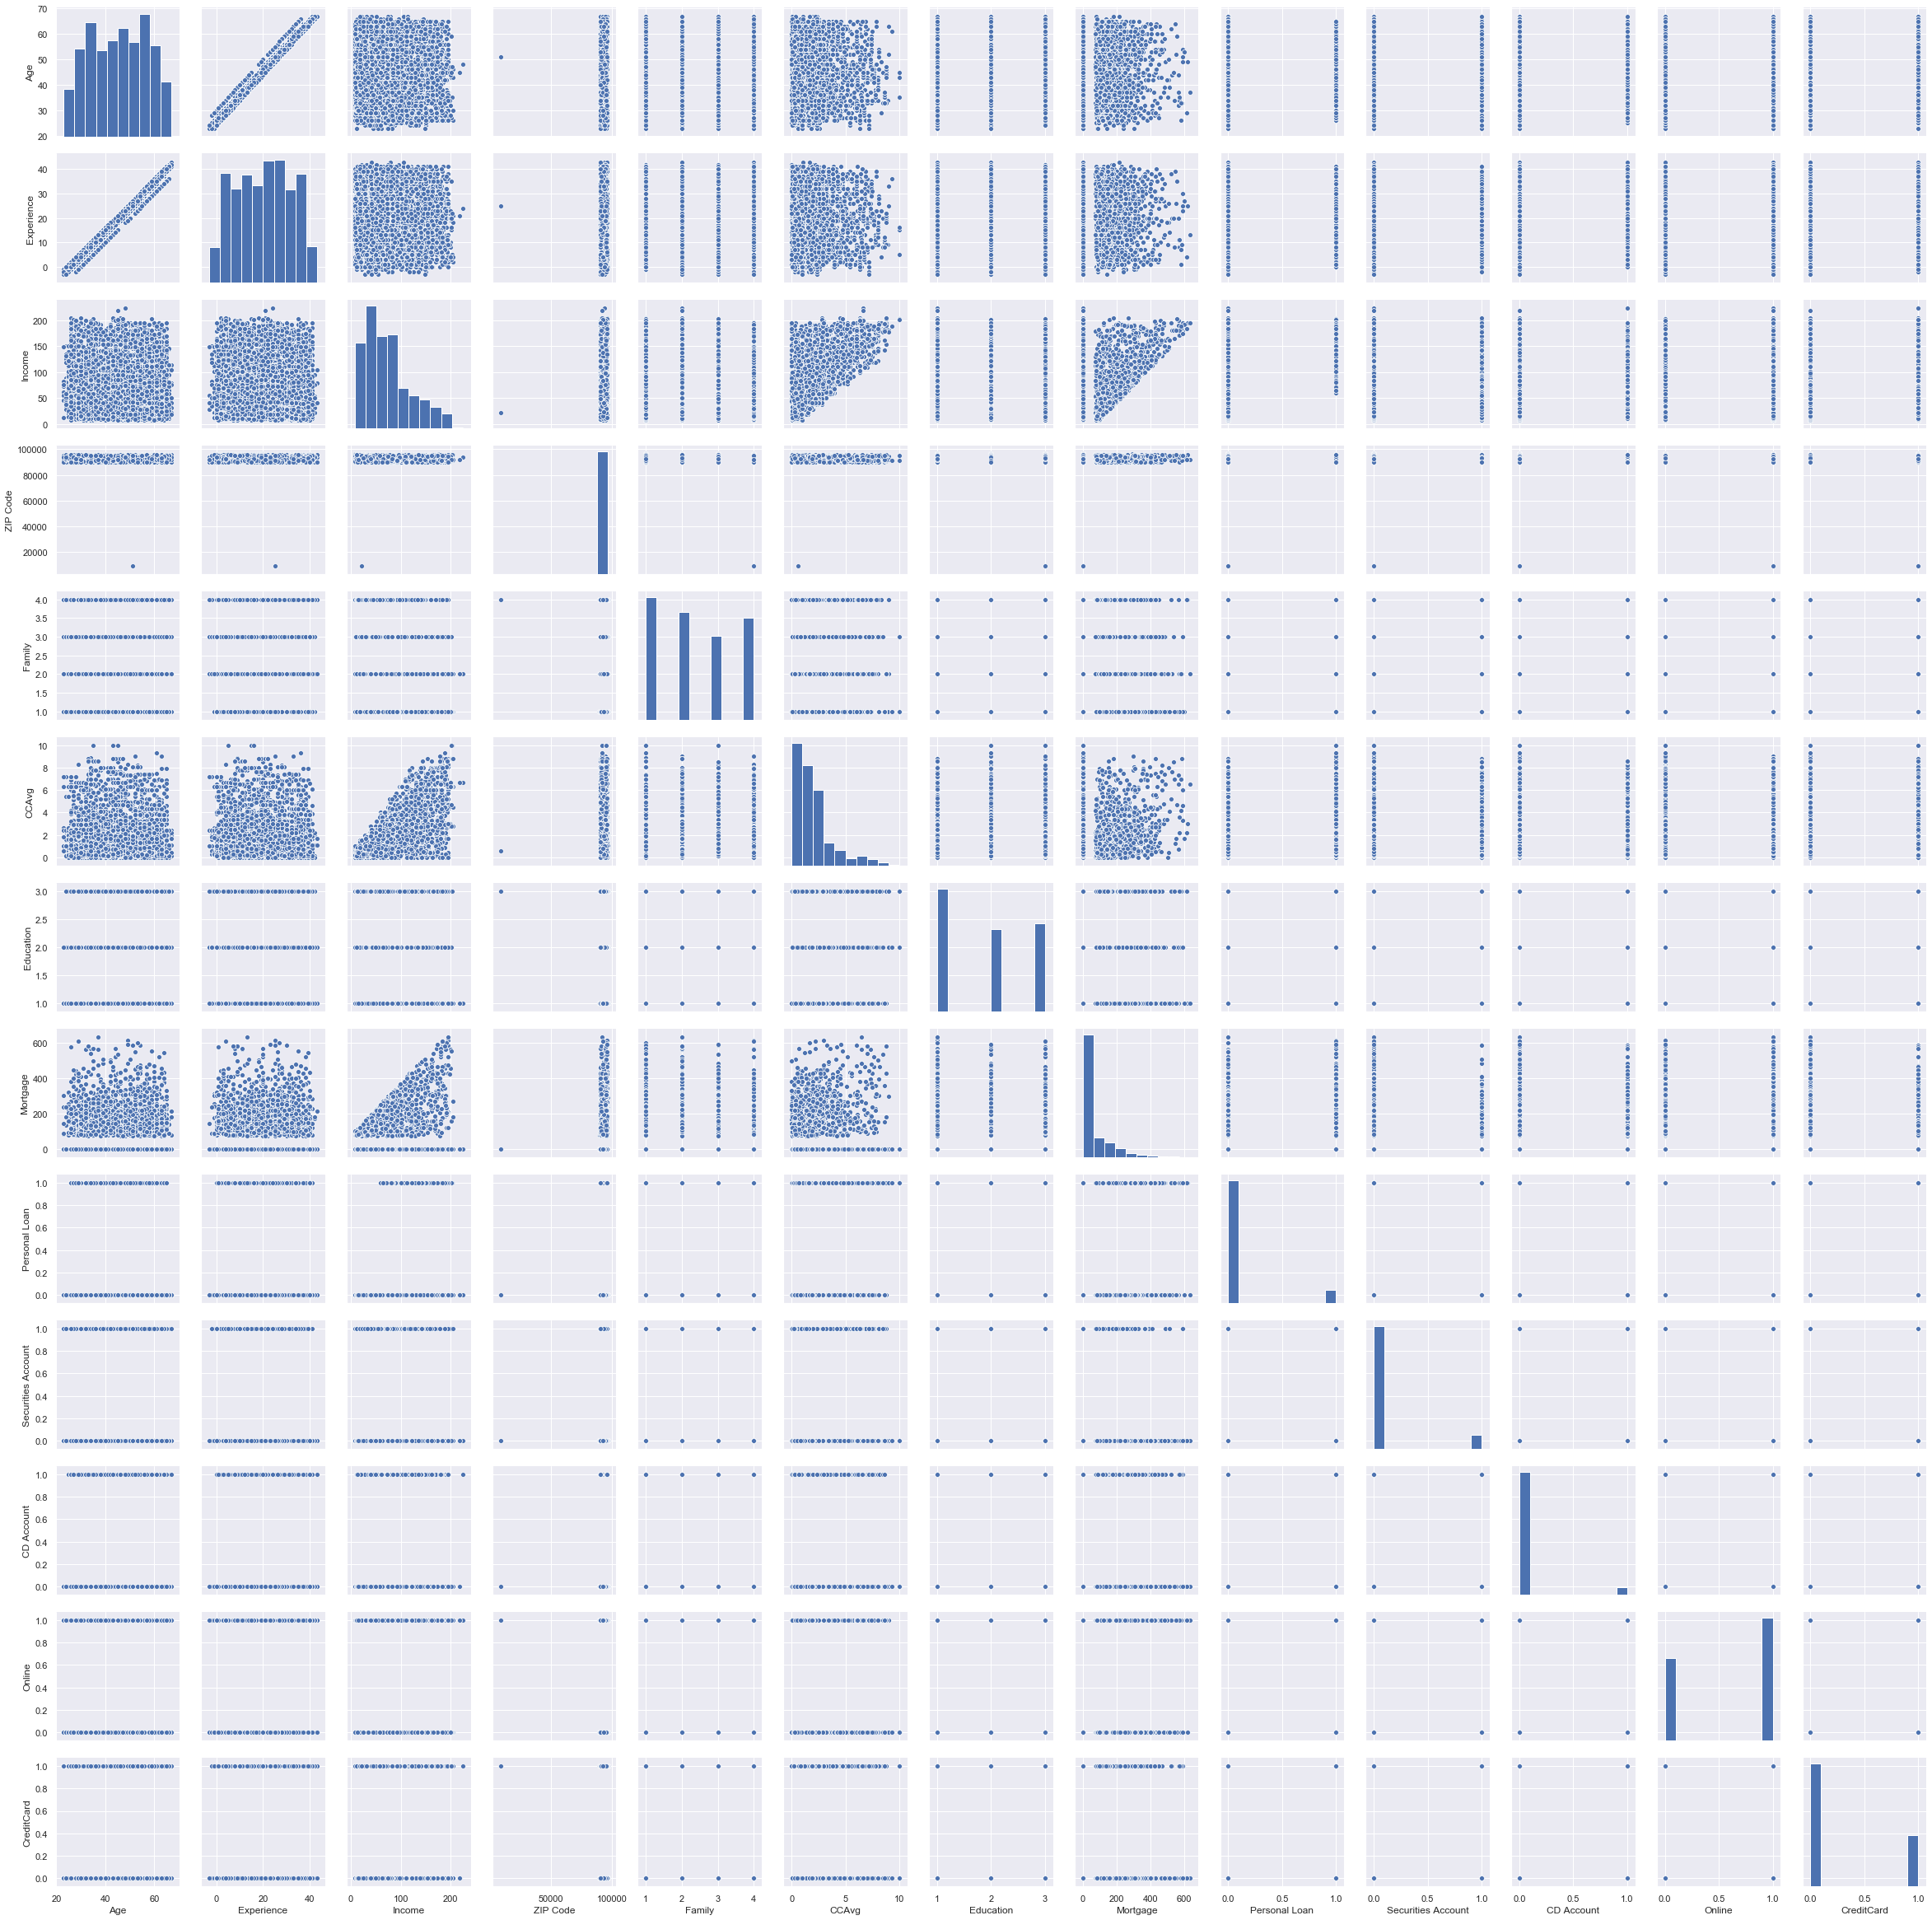

In [295]:
sns.pairplot(df.iloc[:,1:])

1) Age:- feature is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

2) Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience. This could be a data input error as in general it is not possible to measure negative years of experience. We can delete these values, because we have 3 or 4 records from the sample.

3) Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median

4) CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

5) Mortgage 70% of the individuals have a mortgage of less than 40K. However the max value is 635K

6) The variables family and education are ordinal variables. The distribution of families is evenly distributes


It can be seen that the "Experience" variable has negative values, which could possibly mean some error in data.

Hence let us replace those values with the absolute values as it could have been a typing error.

Here we are not taking the mean value into consideration because the mean of Experience column is 20 years.

In [296]:
# there are records with negative experience. Before proceeding any further we need to clean the same
df[df['Experience'] < 0]['Experience'].count()

52

In [297]:
#clean the negative variable
dfExp = df.loc[data['Experience'] >0]
negExp = df.Experience < 0
column_name = 'Experience'
mylist = df.loc[negExp]['ID'].tolist() # getting the customer ID who has negative experience

In [298]:
# there are 52 records with negative experience
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [299]:
df['Experience'] = df["Experience"].abs()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [300]:
df.groupby(["Personal Loan"]).count()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


From the above we can see that the data is having a huge bias (almost 1:10) towards the category of people not accepting the personal loan.

Hence we can form opinion that our model will tend to perform better towards predicting which customers wont accept the personal loan.

However, our problem is to identify the customers that can accept personal loan based on the selected available features.

In [301]:
df0 = df.groupby('Personal Loan')
df0 = df0.get_group(0)
df0.shape , df0.describe().transpose()

((4520, 14),
                      count          mean          std     min       25%  \
 ID                  4520.0   2512.165487  1448.299331     1.0   1259.75   
 Age                 4520.0     45.367257    11.450427    23.0     35.00   
 Experience          4520.0     20.165487    11.398146     0.0     10.00   
 Income              4520.0     66.237389    40.578534     8.0     35.00   
 ZIP Code            4520.0  93152.428761  2156.949654  9307.0  91911.00   
 Family              4520.0      2.373451     1.148771     1.0      1.00   
 CCAvg               4520.0      1.729009     1.567647     0.0      0.60   
 Education           4520.0      1.843584     0.839975     1.0      1.00   
 Mortgage            4520.0     51.789381    92.038931     0.0      0.00   
 Personal Loan       4520.0      0.000000     0.000000     0.0      0.00   
 Securities Account  4520.0      0.102212     0.302961     0.0      0.00   
 CD Account          4520.0      0.035841     0.185913     0.0      0.00   

In [302]:
df1 = df.groupby('Personal Loan')
df1 = df1.get_group(1)
df1.shape , df1.describe().transpose()

((480, 14),
                     count          mean          std      min       25%  \
 ID                  480.0   2390.650000  1394.393674     10.0   1166.50   
 Age                 480.0     45.066667    11.590964     26.0     35.00   
 Experience          480.0     19.843750    11.582443      0.0      9.00   
 Income              480.0    144.745833    31.584429     60.0    122.00   
 ZIP Code            480.0  93153.202083  1759.223753  90016.0  91908.75   
 Family              480.0      2.612500     1.115393      1.0      2.00   
 CCAvg               480.0      3.905354     2.097681      0.0      2.60   
 Education           480.0      2.233333     0.753373      1.0      2.00   
 Mortgage            480.0    100.845833   160.847862      0.0      0.00   
 Personal Loan       480.0      1.000000     0.000000      1.0      1.00   
 Securities Account  480.0      0.125000     0.331064      0.0      0.00   
 CD Account          480.0      0.291667     0.455004      0.0      0.00   


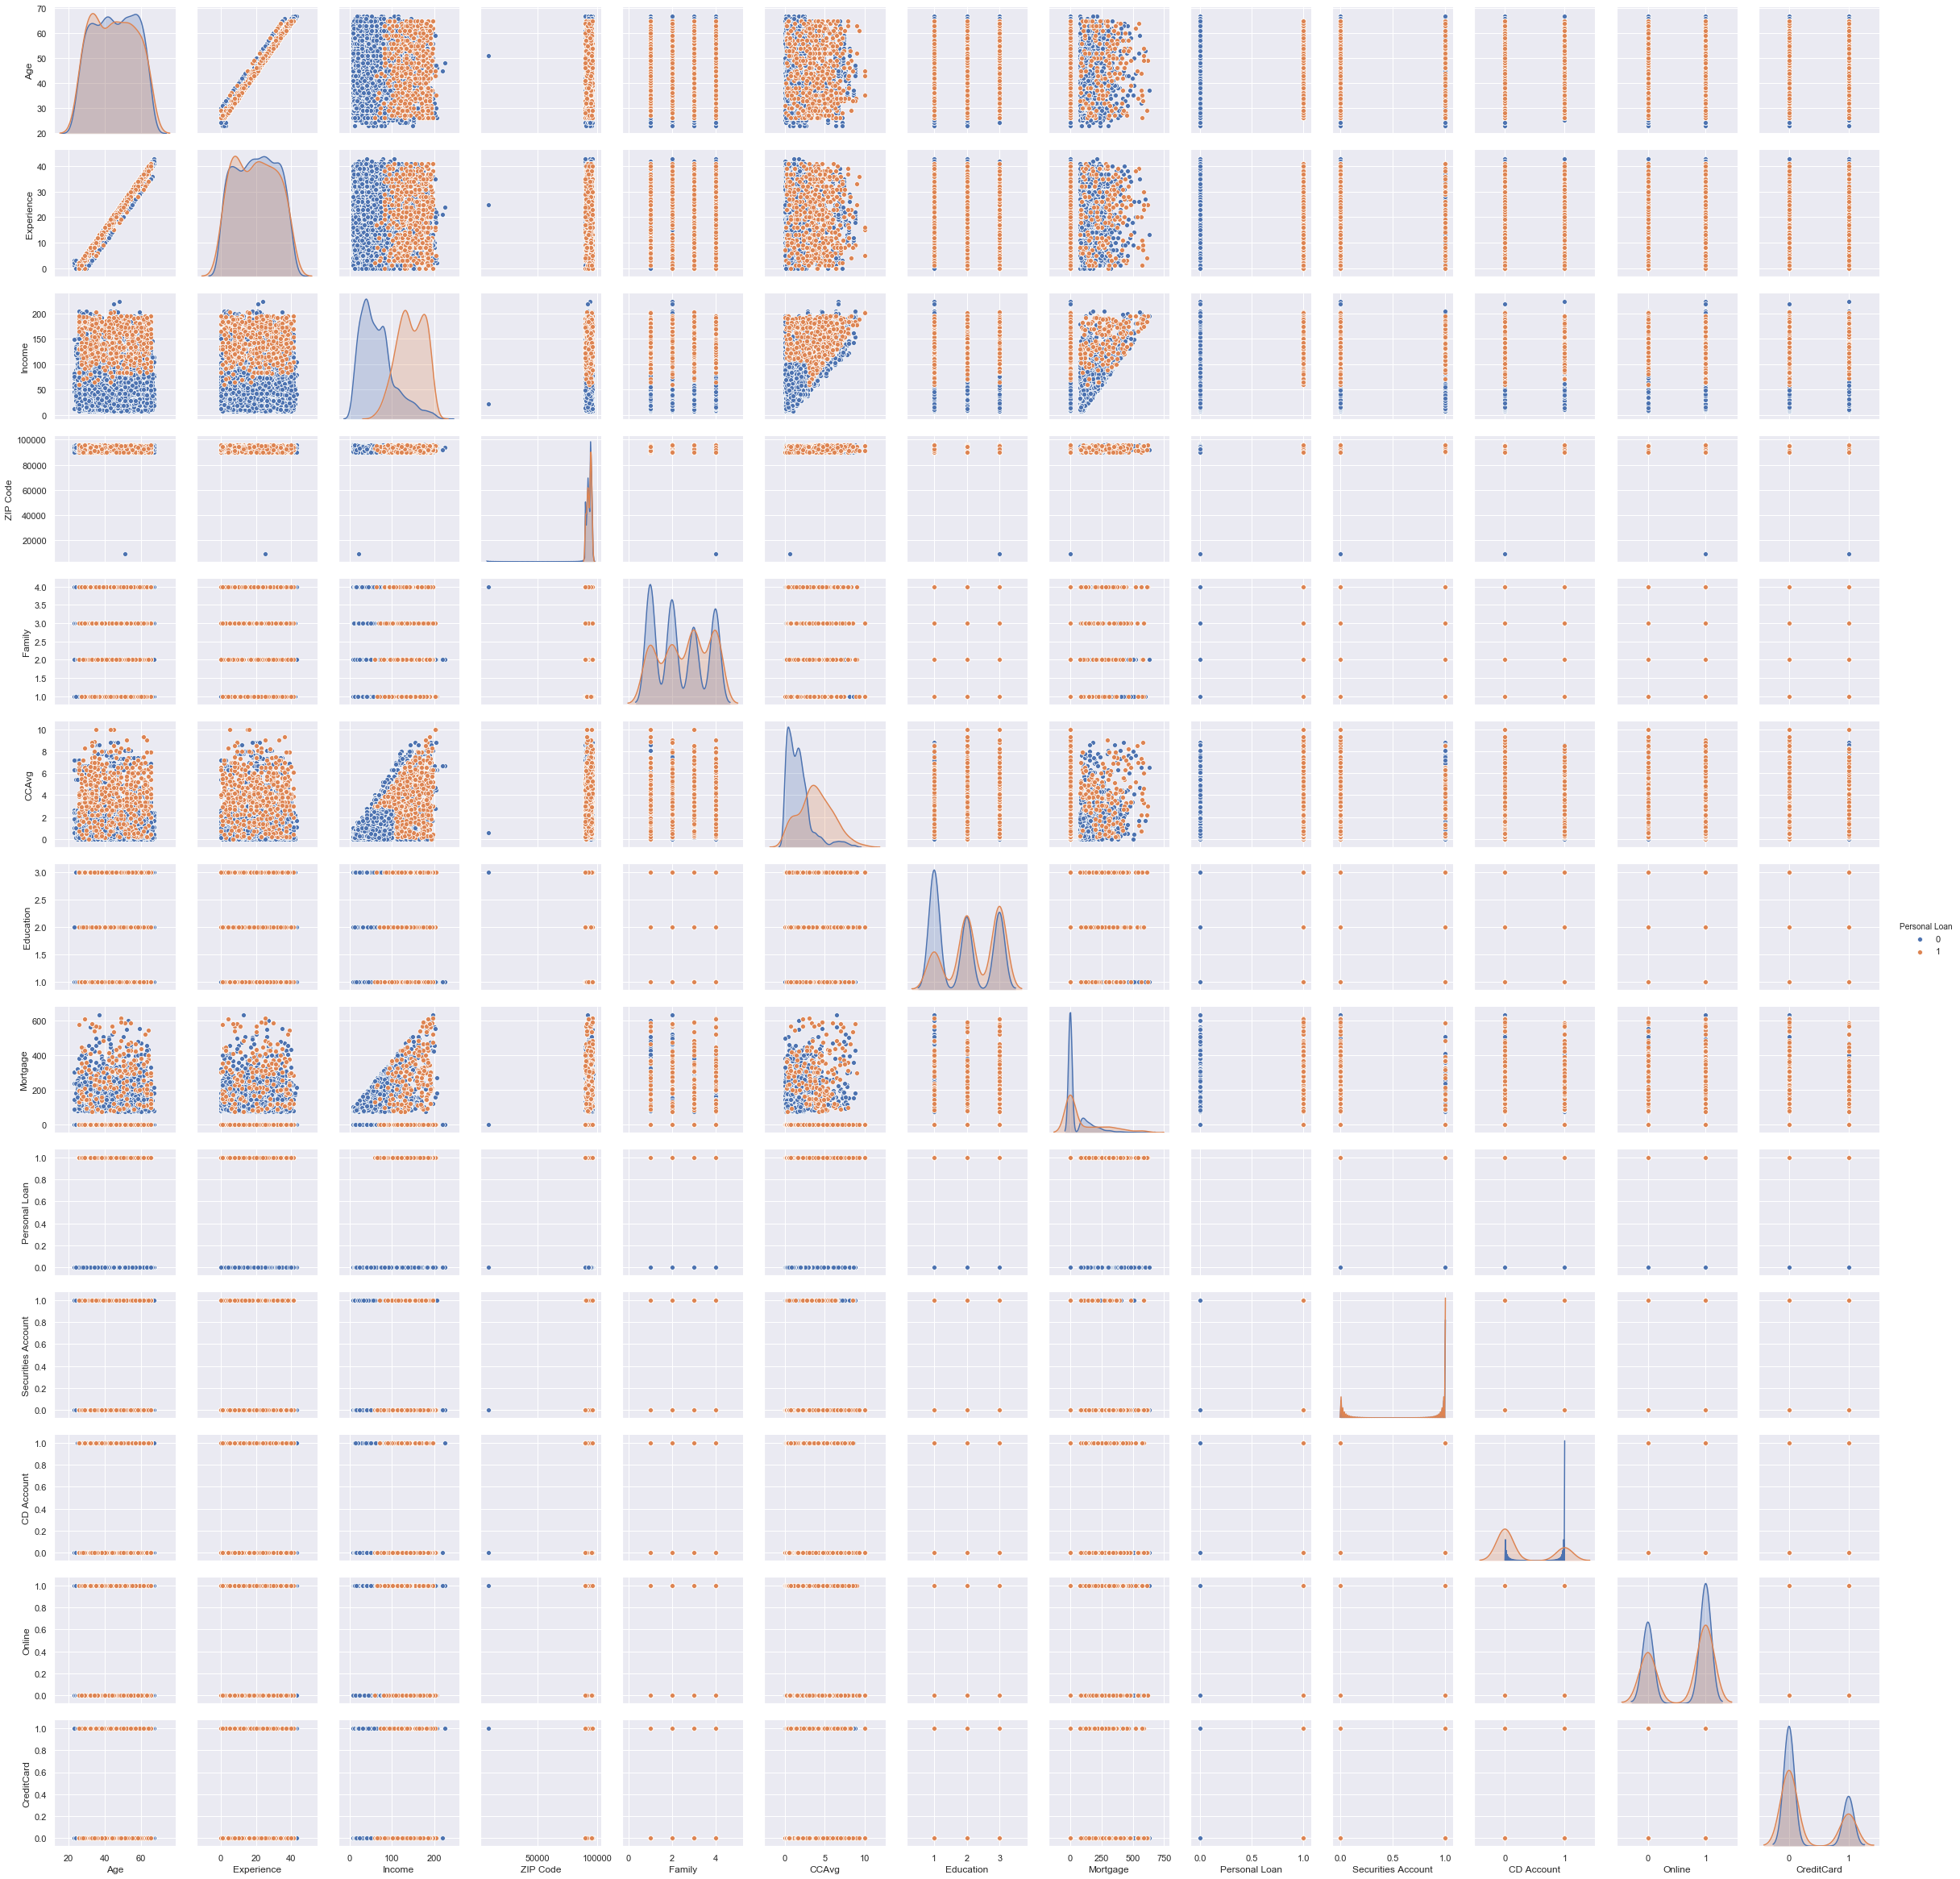

In [303]:
#Lets drop the ID categorical variable for the plotting

sns.pairplot(df.iloc[:,1:], hue='Personal Loan');

# DATA VISUALIZATION

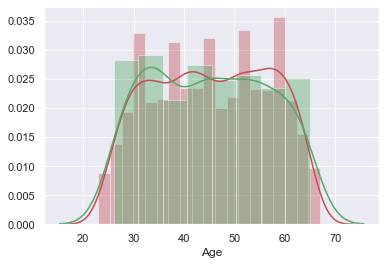

In [304]:
sns.distplot(df0['Age'],color='r');
sns.distplot(df1['Age'],color='G');

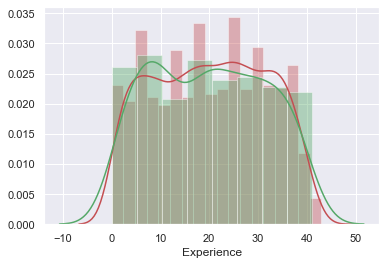

In [305]:
sns.distplot(df0['Experience'], color ='r');
sns.distplot(df1['Experience'], color ='G');

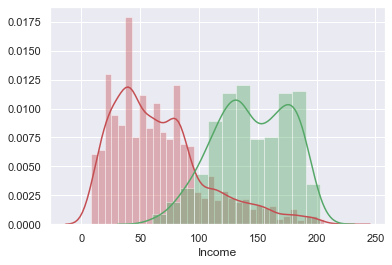

In [306]:
sns.distplot(df0['Income'], color ='r');
sns.distplot(df1['Income'], color ='G');

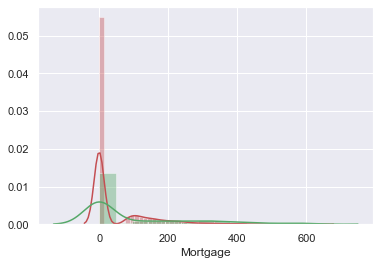

In [307]:
sns.distplot(df0['Mortgage'], color ='r');
sns.distplot(df1['Mortgage'], color ='G');

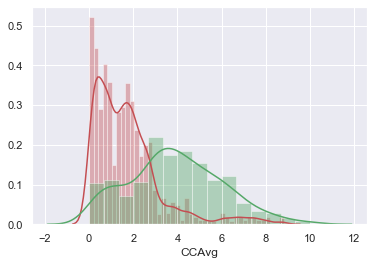

In [308]:
sns.distplot(df0['CCAvg'], color ='r');
sns.distplot(df1['CCAvg'], color ='G');

Age and Experience are normally distributed, with mean and median almost the same.
Income and CCAvg are positively skewed

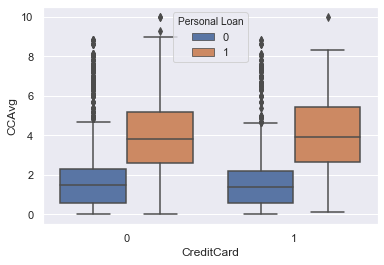

In [309]:
sns.boxplot('CreditCard','CCAvg',hue='Personal Loan',data=df);

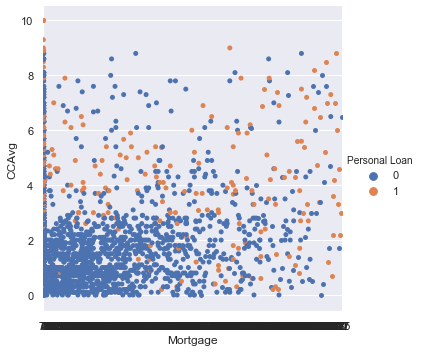

In [310]:
sns.catplot(x='Mortgage', y='CCAvg', hue ='Personal Loan', data = df, kind='swarm');

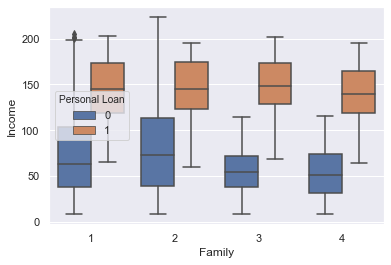

In [311]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df);

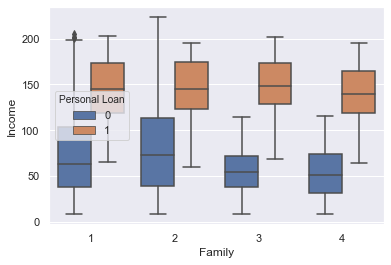

In [312]:

sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df);

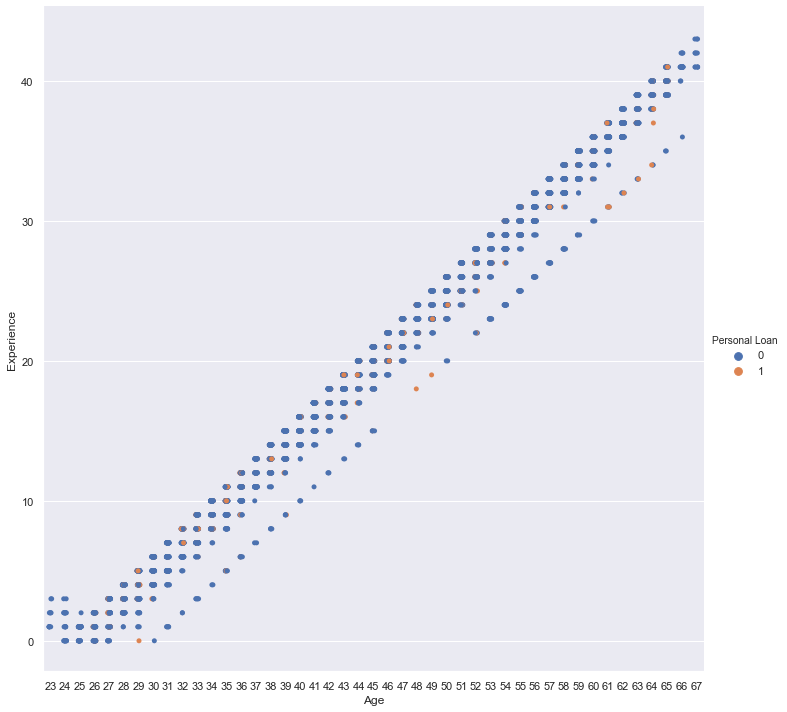

In [315]:
sns.catplot(x='Age', y='Experience', hue ='Personal Loan', data = df, height = 10, aspect=1);


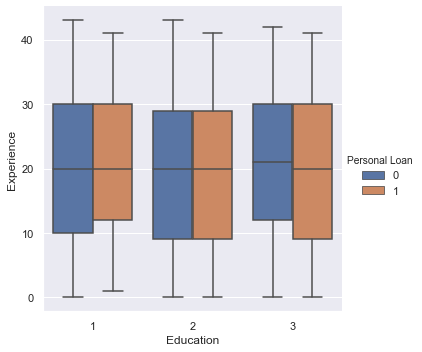

In [316]:
sns.catplot(x='Education', y='Experience', hue ='Personal Loan', data = df, kind='box');

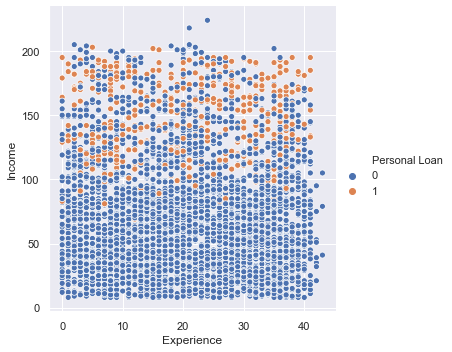

In [317]:
sns.relplot(x='Experience', y='Income', hue ='Personal Loan', data = df);

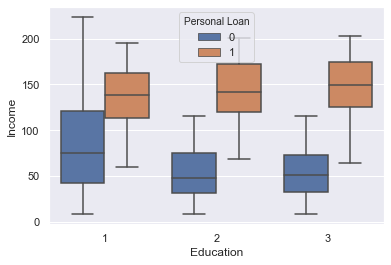

In [318]:

sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df);

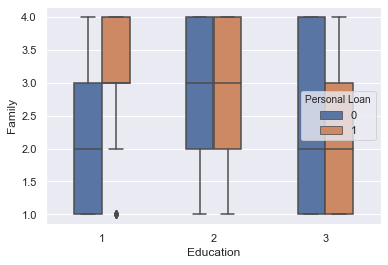

In [319]:
sns.boxplot(x='Education',y='Family',hue='Personal Loan',data=df, width=0.5);

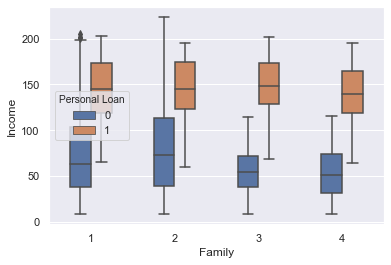

In [320]:
sns.boxplot(x='Family',y='Income',hue='Personal Loan',data=df, width =0.5);

From above, we can see that customers with undergraduate level of education and family > 3 are good prospective customers.
People opting for the loan have the same income range irrespective of the education level.
For Graduate Level and above Education of customers, family size doesnt play a major role in classification.

Graduates and Post graduates have a better chance of becoming customers even if they dont have any experience.
Also, to be noted, is that People with Under graduation have the maximum income range
Education of Graduate and above have more chances of taking the personal loan.
Customers with personal loan also have a higher CCAvg spends.
Customers with income > 100K tend to accept personal loans.
Customers with Higher CCAvg tend to accept personal loans.

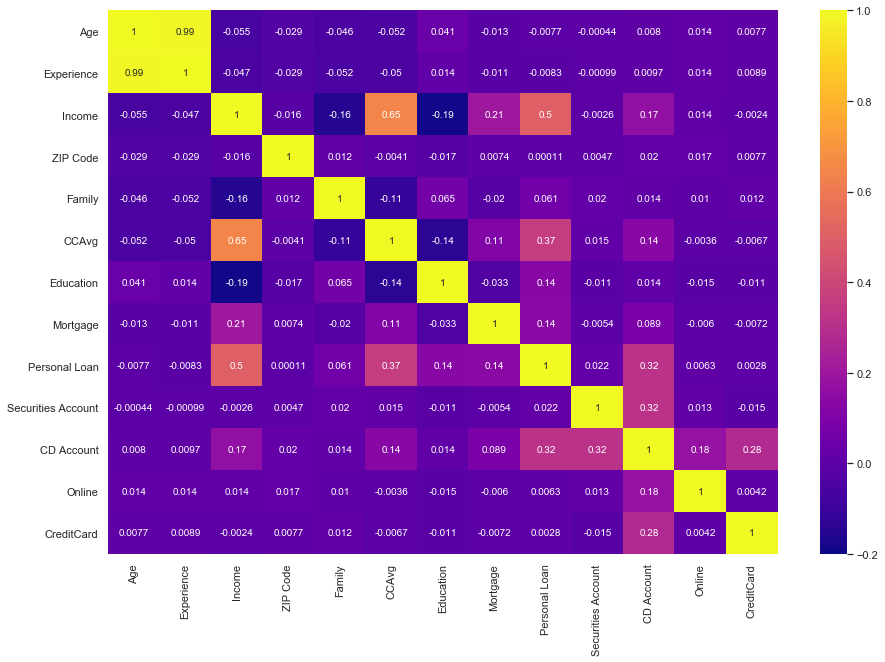

In [321]:
DF_nid= df.drop('ID', axis=1)
corr = DF_nid.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='plasma',vmin=-0.2,vmax=1);

Observations:
1. Age and Experience are highl correlated
2. Personal Loan has maximum correlation with : (Income, CCAvg, CD Account, Mortgage and Education)
3. CD Account is again dependent on (Credit Card, Securities Account, Online, CCAvg and Income)
4. Mortgage has moderate correlation with Income.
5. Income influences CCAvg, Personal Loan, Mortgage, CD Account.

In [322]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Separating the Dependent and independent (Target) variables into two different df
Since Experience and Age are 99% correlated, lets consider only Age for the sake of model building
Since ID doesnt have any effect on the data and is only a categorical variable, we shall drop the same.


In [323]:
X = df.drop(['ID','Experience','Personal Loan'], axis=1)
y = df['Personal Loan']

In [324]:
X.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [325]:
df.shape

(5000, 14)

In [326]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [327]:
from sklearn import preprocessing

ZX = preprocessing.scale(X)
ZX_train, ZX_test, y_train, y_test = train_test_split(ZX, y, test_size=0.3, random_state=10)

# MODEL BUILDING - LOGISTIC REGRESSION

In [328]:
# Importing lbraries from the SCIKIT LEARN
from sklearn.linear_model import LogisticRegression
model1a = LogisticRegression()

# Apply training data to the logistic regression model
model1a.fit(X_train, y_train)

#Predict the test results
y_predict = model1a.predict(X_test)

#Calculate the coefficients of logistic regression model
t = list(X_train.columns)
coef_df = pd.DataFrame(model1a.coef_, columns= t)
coef_df['intercept'] = model1a.intercept_
print(coef_df)

        Age    Income  ZIP Code    Family     CCAvg  Education  Mortgage  \
0  0.007155  0.037557 -0.000071  0.015505  0.005647   0.018257  0.000537   

   Securities Account  CD Account    Online  CreditCard  intercept  
0            0.001144    0.004903 -0.000517   -0.000134  -0.000084  


In [329]:
# Calculate the model score and print confusion matrix

model1a_score = model1a.score(X_test, y_test)
print(model1a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8993333333333333
[[1302   58]
 [  93   47]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1360
           1       0.45      0.34      0.38       140

    accuracy                           0.90      1500
   macro avg       0.69      0.65      0.66      1500
weighted avg       0.89      0.90      0.89      1500



In [330]:
# Apply Scaled training data to the logistic regression model
model1b = LogisticRegression()
model1b.fit(ZX_train, y_train)

#Predict the test results
y_predict = model1b.predict(ZX_test)

#Calculate the coefficients of logistic regression model

coef_df = pd.DataFrame(model1b.coef_, columns= t)
coef_df['intercept'] = model1b.intercept_
print(coef_df)

        Age   Income  ZIP Code    Family     CCAvg  Education  Mortgage  \
0  0.091097  2.43813  -0.02636  0.758031  0.181394   1.338921  0.001545   

   Securities Account  CD Account    Online  CreditCard  intercept  
0           -0.209886    0.843772 -0.355392   -0.471615  -4.467691  


In [331]:
model1b_score = model1b.score(ZX_test, y_test)
print(model1b_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9526666666666667
[[1339   21]
 [  50   90]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.81      0.64      0.72       140

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



# MODEL BUILDING - NAIVE BAYE

In [332]:
from sklearn.naive_bayes import GaussianNB

model2a = GaussianNB()
model2a.fit(X_train,y_train)
y_predict = model2a.predict(X_test)
model2a_score = model2a.score(X_test, y_test)
print(model2a_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.886
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1360
           1       0.42      0.61      0.50       140

    accuracy                           0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500

[[1243  117]
 [  54   86]]


In [333]:
model2b = GaussianNB()
model2b.fit(ZX_train,y_train)
y_predict = model2b.predict(ZX_test)
model2b_score = model2b.score(ZX_test, y_test)
print(model2b_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.8786666666666667
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500

[[1234  126]
 [  56   84]]


# MODEL BUILDING - k-Nearest Neighbors (KNN

In [334]:
from sklearn.neighbors import KNeighborsClassifier
NNH_a= KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH_a.fit(X_train, y_train)
y_predict = NNH_a.predict(X_test)
NNH_a_score = NNH_a.score(X_test, y_test)
print(NNH_a_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.8813333333333333
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1360
           1       0.34      0.30      0.32       140

    accuracy                           0.88      1500
   macro avg       0.64      0.62      0.63      1500
weighted avg       0.87      0.88      0.88      1500

[[1280   80]
 [  98   42]]


In [335]:
NNH_b = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH_b.fit(ZX_train, y_train)
y_predict = NNH_b.predict(ZX_test)
NNH_b_score = NNH_b.score(ZX_test, y_test)
print(NNH_b_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.964
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.92      0.67      0.78       140

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500

[[1352    8]
 [  46   94]]


# COMPARISON OF MODELS

In [336]:
Accuracy_Before_Scaling = {'Logistic Regression': model1a_score, 'Naive Bayes': model2a_score, 'K-Nearest Neighbors': NNH_a_score}
Accuracy_After_Scaling = {'Logistic Regression': model1b_score, 'Naive Bayes': model2b_score, 'K-Nearest Neighbors': NNH_b_score}

print('Overall Model Accuracy before scaling:')
print (Accuracy_Before_Scaling)
print('\n')
print('Overall Model Accuracy After scaling:')
print (Accuracy_After_Scaling)

Overall Model Accuracy before scaling:
{'Logistic Regression': 0.8993333333333333, 'Naive Bayes': 0.886, 'K-Nearest Neighbors': 0.8813333333333333}


Overall Model Accuracy After scaling:
{'Logistic Regression': 0.9526666666666667, 'Naive Bayes': 0.8786666666666667, 'K-Nearest Neighbors': 0.964}


From the above, we can clearly see that k-Nearest neighbors algorithm with scaled data gives us the best accuracy of 96.4%, as well as the least Type 1 (False Positive) and Type 2 (False Negative) errors.



Hence, In the current set of algorithms applied on the available data, it seems to be the best choice to predict the customers who will accept the personal loan